In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
import re
from nltk.stem import PorterStemmer
from textblob import TextBlob, Word
from nltk import pos_tag


In [2]:
pip install wordcloud


In [3]:
from wordcloud import WordCloud


In [4]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [5]:
from textblob import TextBlob


### Upload the data

In [6]:
# Load the dataset

df = pd.read_excel('Womens Clothing Reviews Data.xlsx')  


### Basic exploratory analysis

In [7]:
df.shape

(23486, 11)

In [8]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [10]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [11]:
# Rename the column 'Customer Age' to 'Customer_Age'
df.rename(columns={'Customer Age': 'Customer_Age', 'Product ID': 'Product_ID', 'Review Title': 'Review_Title', 'Review Text': 'Review_Text', 
                   'Recommend Flag': 'Recommend_Flag' }, inplace=True)

print(df.columns)


Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')


In [12]:
# Total no. of products

df.Product_ID.nunique()

1206

In [13]:
df.sort_values(by='Rating', ascending=False)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
11743,960,General,Jackets,Jackets,Bangalore,Web,51,Love!,I absolutely love this vest. it fits extremely...,5,1
13393,1153,General,Dresses,Dresses,Mumbai,Mobile,39,Gorgeous classic in navy,Byron lars knows how to make you look like a w...,5,1
13397,1072,General,Dresses,Dresses,Mumbai,Mobile,52,NaN,NaN,5,1
13398,1094,General Petite,Dresses,Dresses,Chennai,Web,44,It does work for busty gals!!!,My mom pointed out this dress in the store a w...,5,1
13399,927,General Petite,Tops,Sweaters,Gurgaon,Web,36,Buy this!,Fits perfect!,5,1
...,...,...,...,...,...,...,...,...,...,...,...
19304,1103,General,Dresses,Dresses,Mumbai,Web,91,I don't understand this dress,I have been continually disappointed in retail...,1,0
19288,1078,General Petite,Dresses,Dresses,Gurgaon,Web,39,Not flattering,Didn't like the dress. look pregnant in it. th...,1,0
19283,818,General,Tops,Blouses,Gurgaon,Mobile,65,What a mess!,This top is crazy in the front and just way-of...,1,0
19275,818,General,Tops,Blouses,Mumbai,Web,45,Disappointing blouse,"This looked like a simple, chic blouse, but th...",1,0


In [14]:
df.Rating.value_counts(normalize=True)

Rating
5    0.559099
4    0.216171
3    0.122243
2    0.066635
1    0.035851
Name: proportion, dtype: float64

In [15]:
df.Recommend_Flag.value_counts(normalize=True)


Recommend_Flag
1    0.822362
0    0.177638
Name: proportion, dtype: float64

In [16]:
# Check for missing values

df.isnull().sum()



Product_ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer_Age         0
Review_Title      3810
Review_Text        845
Rating               0
Recommend_Flag       0
dtype: int64

In [17]:
# Impute missing values in Category, Subcategory1, Subcategory2 with mode

df['Category'].fillna(df['Category'].mode()[0], inplace=True)
df['Subcategory1'].fillna(df['Subcategory1'].mode()[0], inplace=True)
df['SubCategory2'].fillna(df['SubCategory2'].mode()[0], inplace=True)



In [18]:
# Fill missing Review Titles with 'No Title'

df['Review_Title'].fillna('No Title', inplace=True)

# Drop rows with missing Review Text since text is critical for sentiment analysis

df.dropna(subset=['Review_Text'], inplace=True)

# Recheck for missing values
print(df.isnull().sum())

Product_ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer_Age      0
Review_Title      0
Review_Text       0
Rating            0
Recommend_Flag    0
dtype: int64


In [19]:
# Average rating corresponding to each product

df.groupby('Product_ID')['Rating'].mean().reset_index().sort_values(by='Rating', ascending = False)

,Product_ID,Rating
1178,1205,5.0
431,449,5.0
454,474,5.0
452,472,5.0
451,471,5.0
...,...,...
332,348,1.0
271,285,1.0
403,421,1.0
1150,1176,1.0


In [20]:
# Average rating and total # of customers corresponding to each product

df.groupby('Product_ID')['Rating'].agg(['mean', 'count']).reset_index().sort_values(by='count', ascending=False)

,Product_ID,mean,count
1053,1078,4.189463,987
838,862,4.192802,778
1069,1094,4.185034,735
1056,1081,4.265597,561
848,872,4.371869,519
...,...,...,...
463,483,5.000000,1
464,484,5.000000,1
465,485,5.000000,1
467,487,5.000000,1


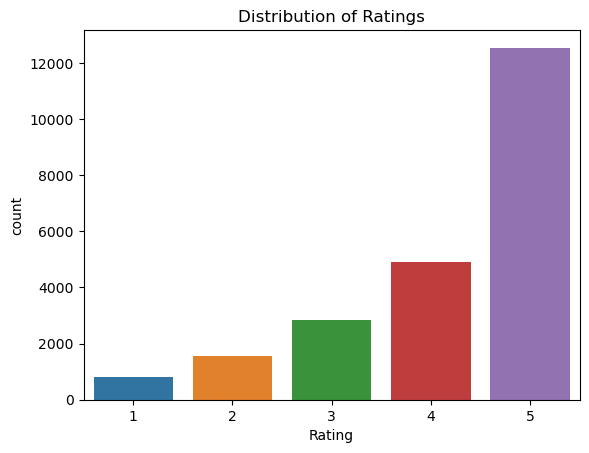

In [21]:
# Distribution of Ratings

sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()




## Sentiment Analysis with polarity

In [22]:
df.Review_Text[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [23]:
TextBlob(df.Review_Text[0]).sentiment.polarity

0.6333333333333333

In [24]:
df.Review_Text[19288]

"Didn't like the dress. look pregnant in it. this dress is going back."

In [25]:
TextBlob(df.Review_Text[19288]).sentiment.polarity

0.16666666666666666

In [26]:
df['sentiment_score'] = df["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [27]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,0.339583
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891


In [28]:
df['sentiment'] = np.where(df.sentiment_score>0.05,'Positive',np.where(df.sentiment_score<-0.05, 'Negative', 'Neutral'))

In [29]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score,sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive


In [30]:
pd.crosstab(df.Rating, df.sentiment) 

sentiment,Negative,Neutral,Positive
Rating,,,
1,176,170,475
2,187,273,1089
3,185,382,2256
4,110,361,4437
5,107,422,12011


In [31]:
negativesent_positscore = df[((df.sentiment == 'Negative') & (df.Rating >=4))]

In [32]:
negativesent_positscore.Review_Text

72       I have a short torso and this works well for m...
180      Loved the green color, the cut is super flatte...
215      Ranna designs richly detailed dresses and this...
283      I want to live in this sweatshirt. it's so com...
371      I tried this on the other day at the local sto...
                               ...                        
22953    Per reviews and from looking at retailer emplo...
23091    A little treat for me. i work from home and am...
23104    I was in trouble when i saw this dress in the ...
23113    I was planning to order it online but someone ...
23323    I just got this shirt the other day at the sto...
Name: Review_Text, Length: 217, dtype: object

In [33]:
negativesent_positscore.Review_Text[180]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('

In [34]:
df.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag', 'sentiment_score', 'sentiment'],
      dtype='object')

### Understand sentiment on the different categories, sub categories, products, location and age group

In [35]:
# Average sentiment by Category

sentiment_by_category = df.groupby('Category')['sentiment_score'].mean().reset_index()
sentiment_by_category


,Category,sentiment_score
0,General,0.247101
1,General Petite,0.252963
2,Initmates,0.256951


In [36]:
# Average sentiment by Subcategory Level 1

sentiment_by_subcategory1 = df.groupby('Subcategory1')['sentiment_score'].mean().reset_index()


In [37]:
# Average sentiment by Subcategory Level 2

sentiment_by_subcategory2 = df.groupby('SubCategory2')['sentiment_score'].mean().reset_index()



In [38]:
# Average sentiment by Location

sentiment_by_location = df.groupby('Location')['sentiment_score'].mean().reset_index()



In [39]:
# Average sentiment by Age Group (bucket customers into age groups if necessary)

df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[18, 25, 35, 50, 65, 100], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
sentiment_by_age_group = df.groupby('Age_Group')['sentiment_score'].mean().reset_index()
sentiment_by_age_group

C:\Users\karis\AppData\Local\Temp\ipykernel_23516\3540409805.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age_group = df.groupby('Age_Group')['sentiment_score'].mean().reset_index()


,Age_Group,sentiment_score
0,18-25,0.259393
1,26-35,0.248808
2,36-50,0.246423
3,51-65,0.255416
4,65+,0.248329


## Word clouds for positive and negative reviews(based on rating)

In [40]:
Positive_review = df.Review_Text[df.Rating>=4]
Negative_review = df.Review_Text[df.Rating<4]

In [41]:
Positive_review

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23476    These bottoms are very cute but defiantly chee...
23477    I'm so impressed with the beautiful color comb...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 17448, dtype: object

In [42]:
stop = set(nltk.corpus.stopwords.words('english'))
import re

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace('return factor',"return factor").replace('cons','')
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [43]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:

Positive_review = Positive_review.apply(lambda x: clean_text(x) if isinstance(x, str) else x)
Positive_review = Positive_review.apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)


In [45]:

Negative_review = Negative_review.apply(lambda x: clean_text(x) if isinstance(x, str) else x)
Negative_review = Negative_review.apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)


In [46]:
Positive_review

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23476    bottoms cute defiantly cheeky would recommend ...
23477    im impressed beautiful color combinations embr...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23485    dress lovely platinum feminine fits perfectly ...
Name: Review_Text, Length: 17448, dtype: object

In [47]:
Negative_review

2        high hopes dress really wanted work initially ...
5        love tracy reese dresses one petite feet tall ...
10       dress runs small esp zipper area runs ordered ...
14       nice choice holiday gatherings like length gra...
16       material color nice leg opening large length h...
                               ...                        
23475    cute dress waist high sleeves tight maybe diff...
23478    surprised positive reviews product terrible cu...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
Name: Review_Text, Length: 5193, dtype: object

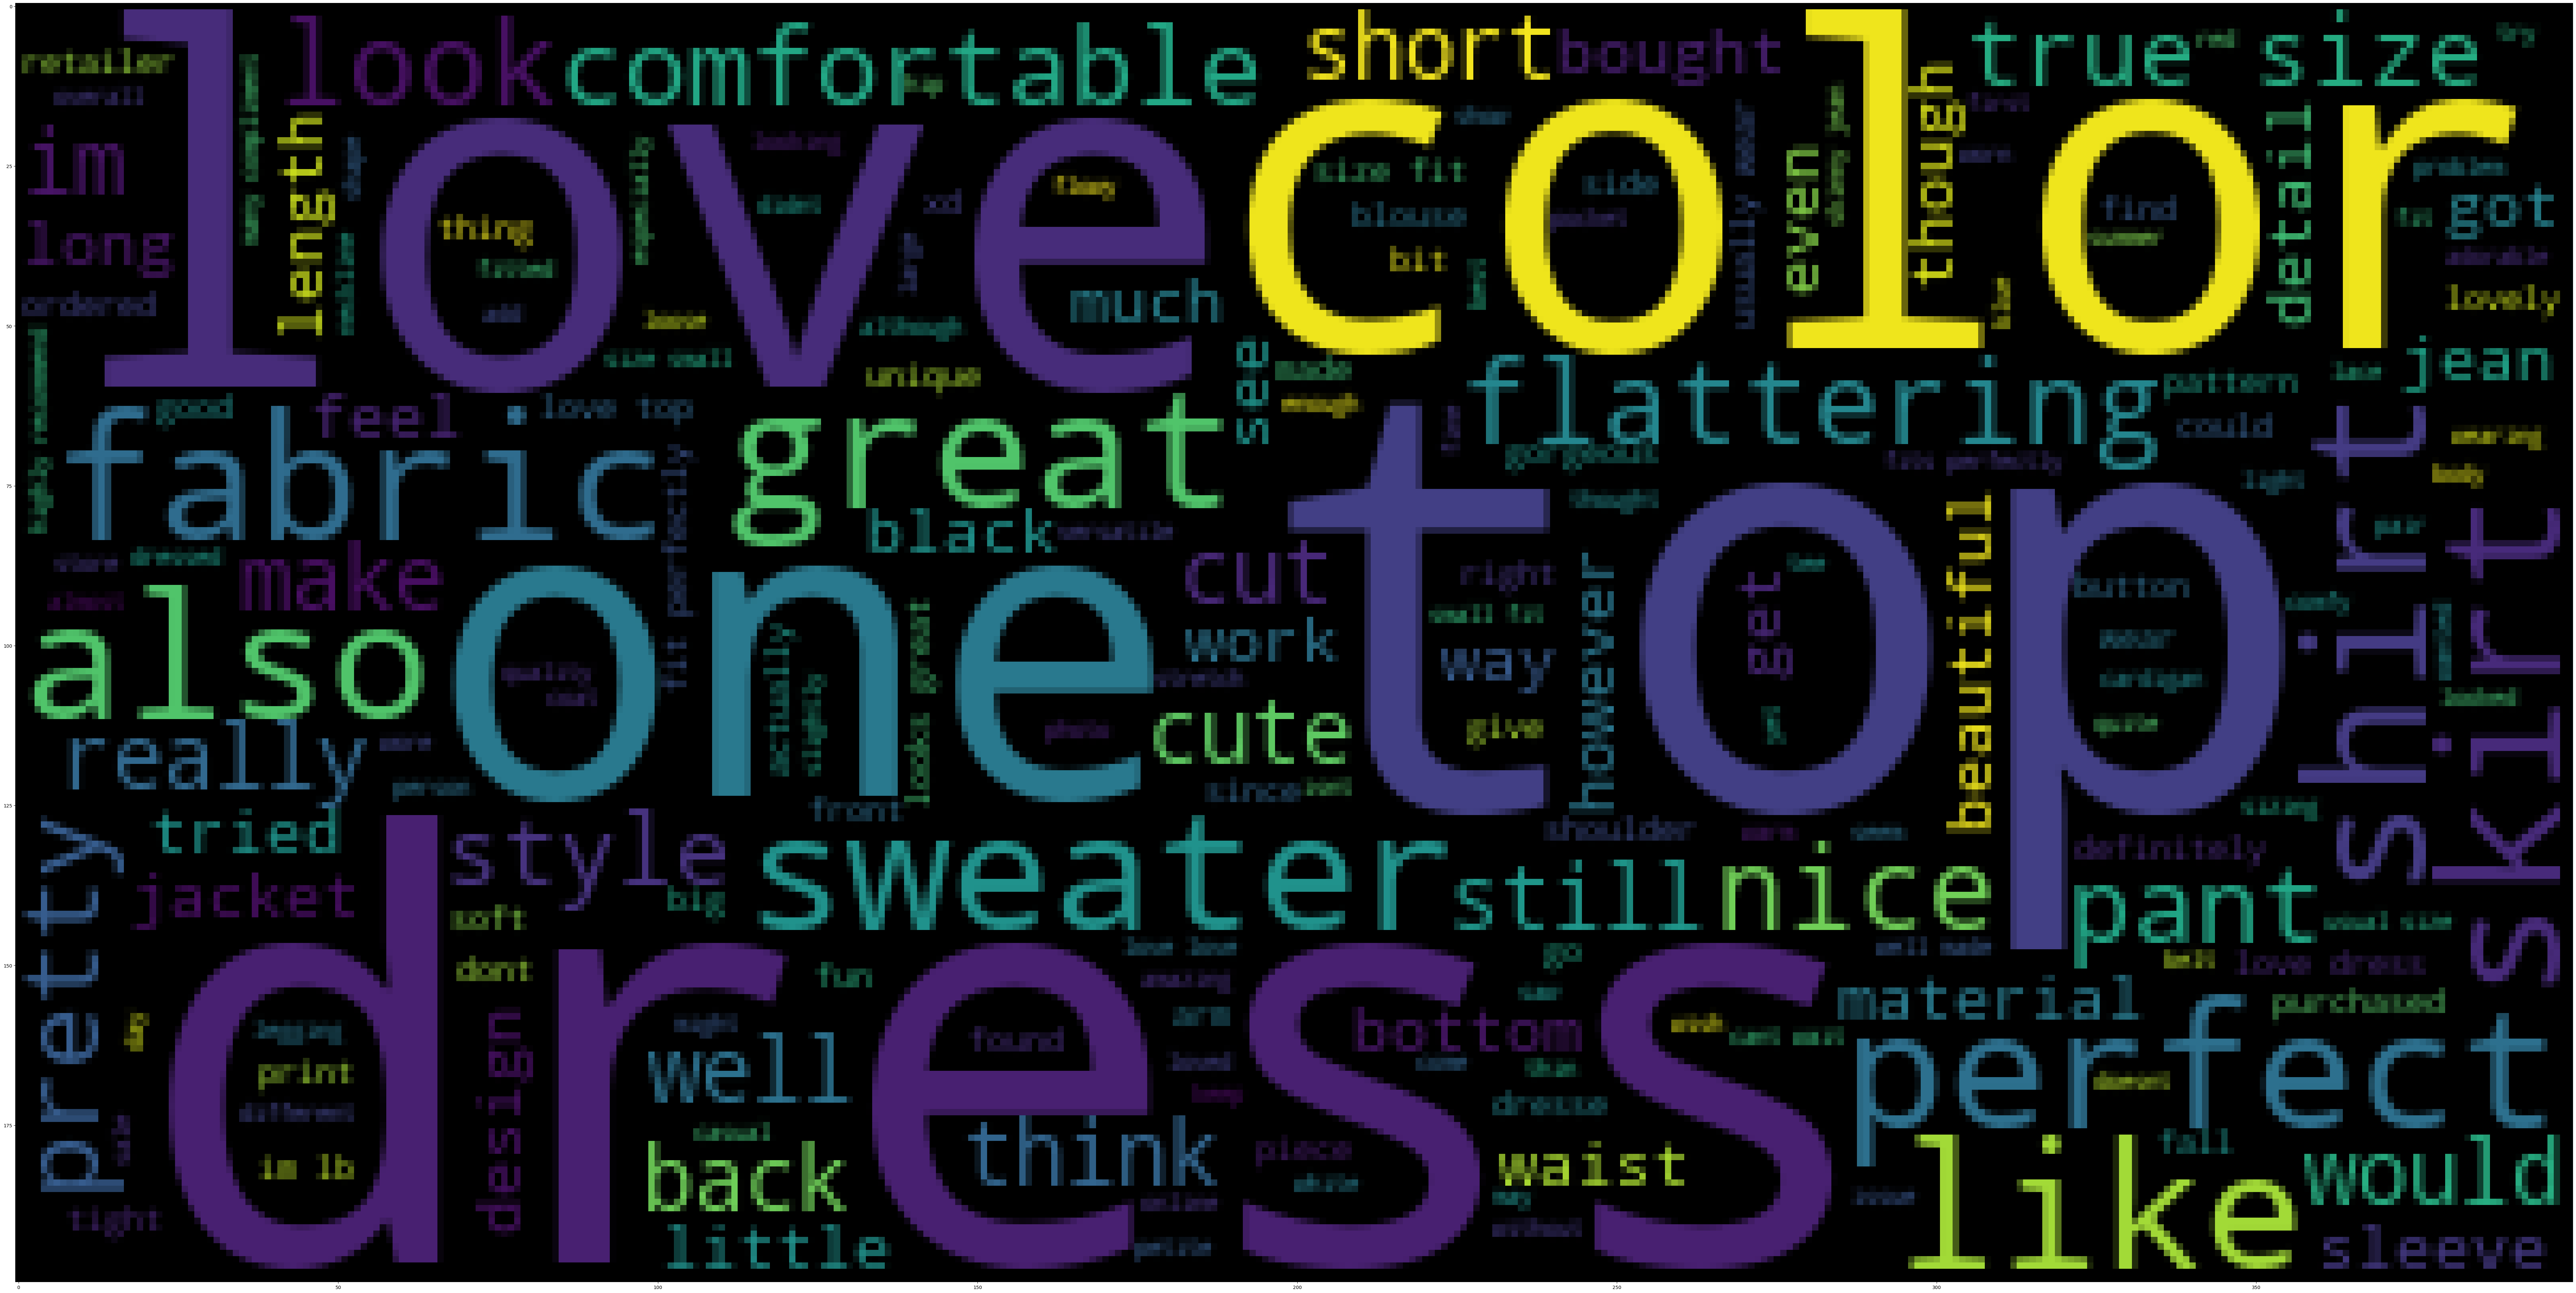

In [48]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist())) # Provide a single corpus

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

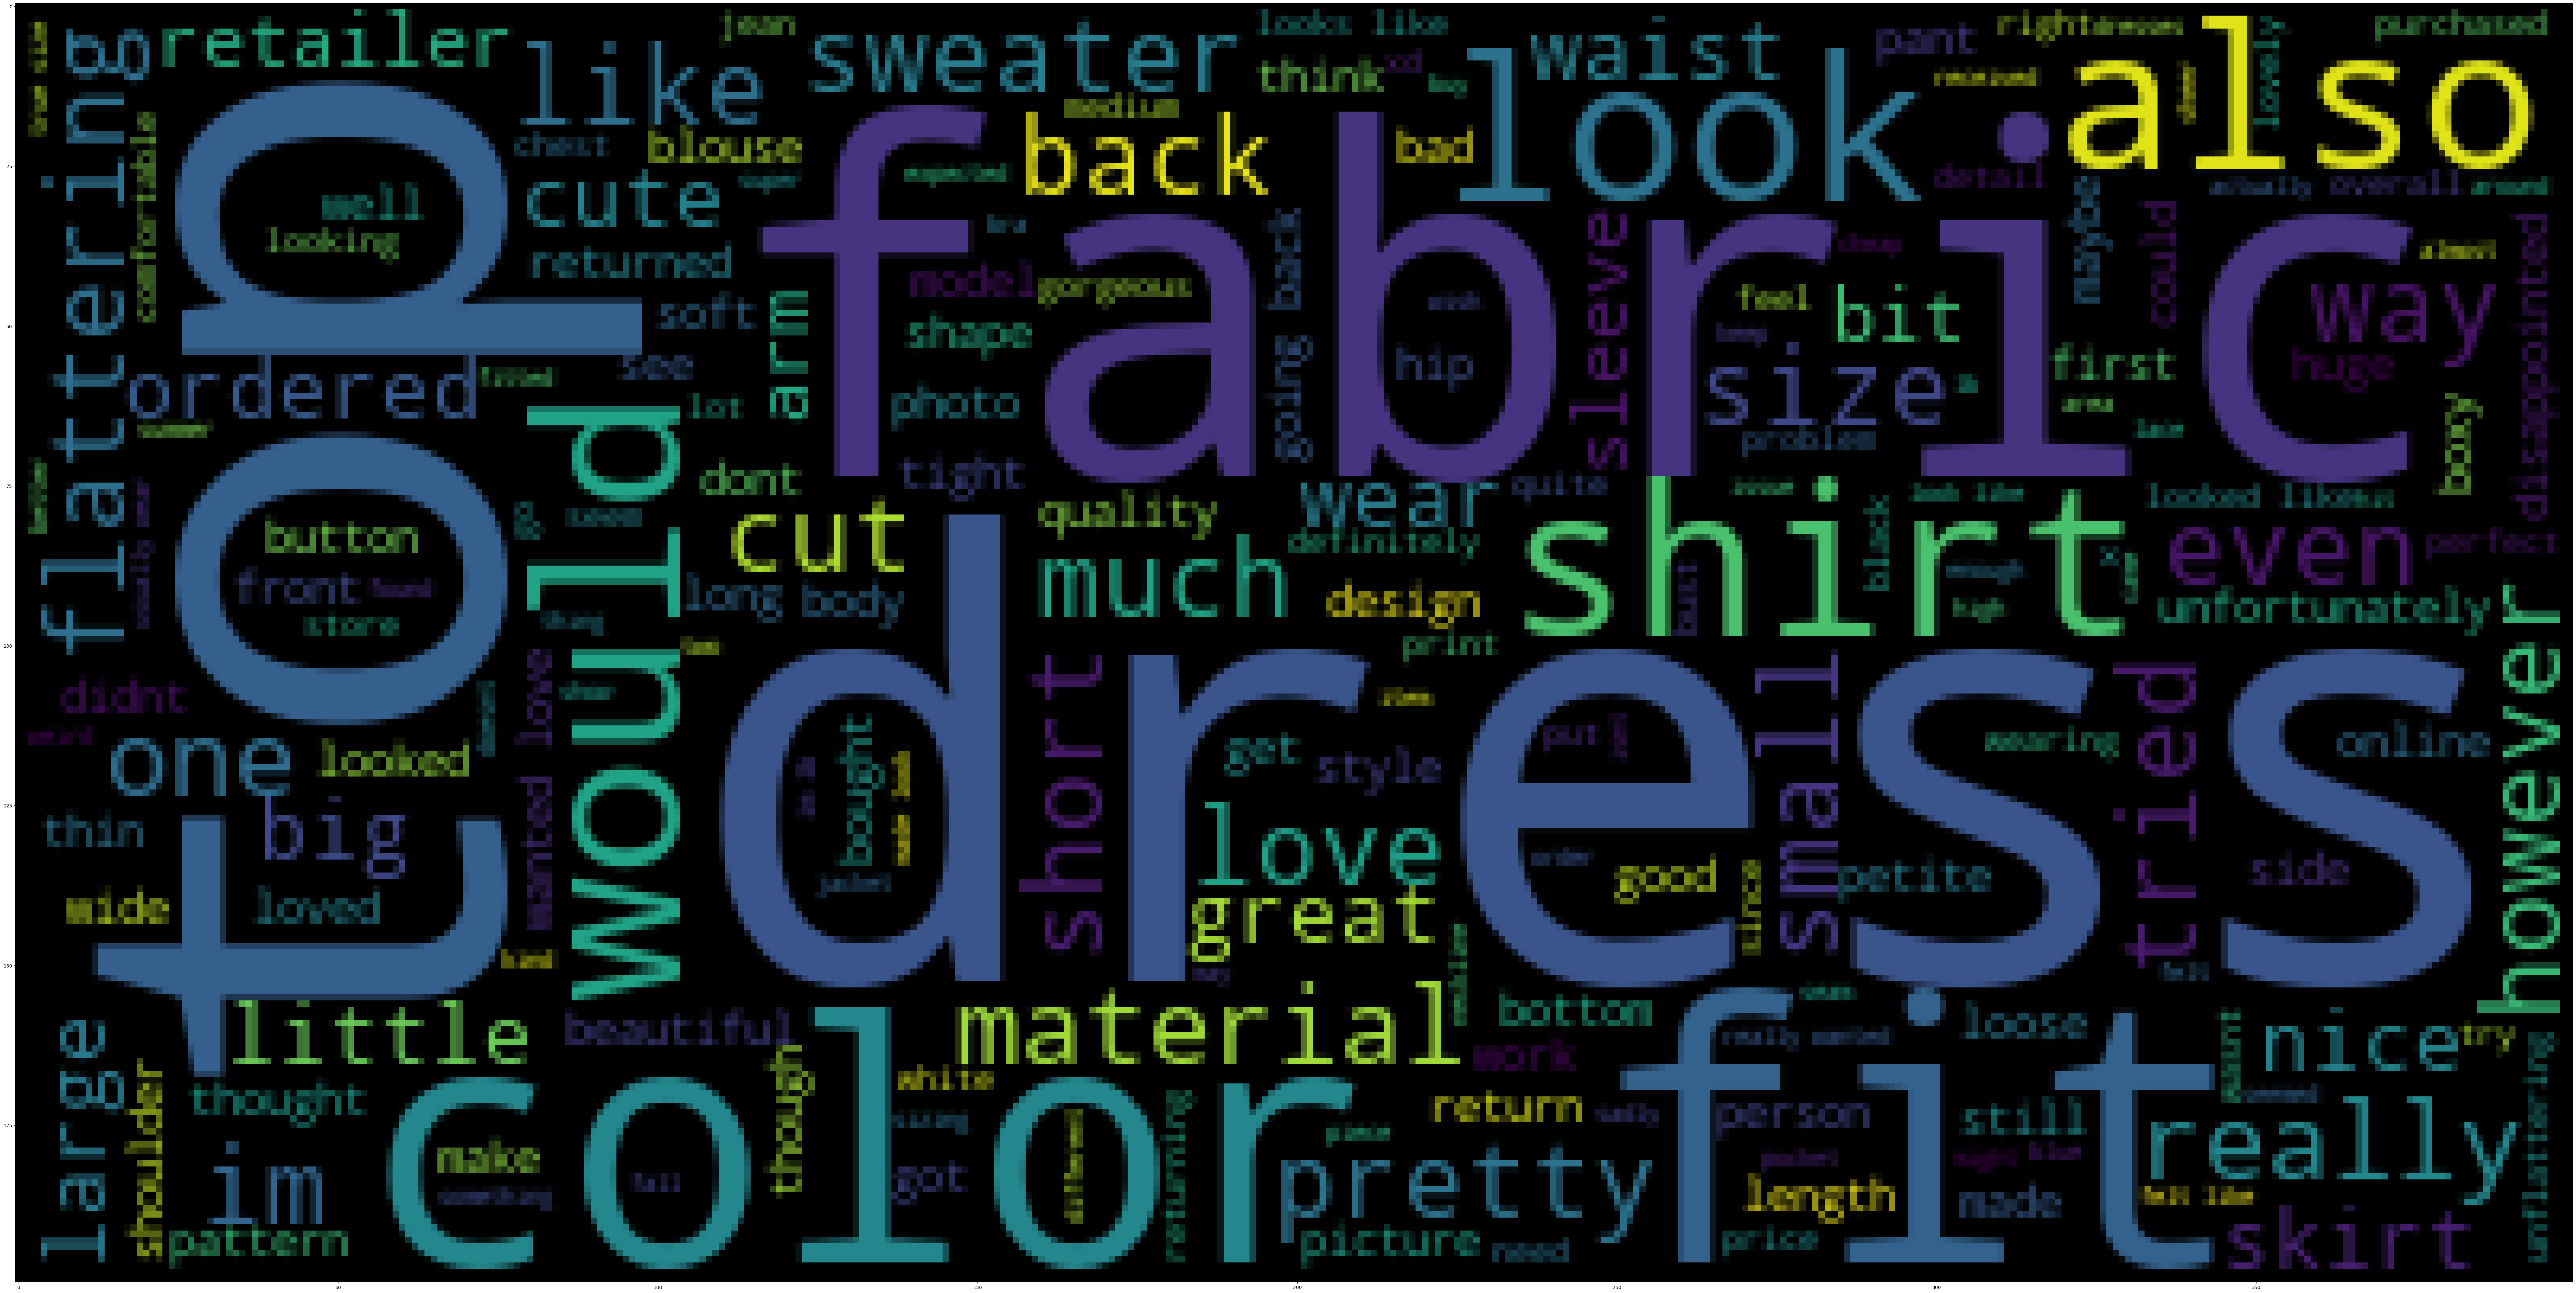

In [49]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Perfom text mining tasks to understand what most frequent words are used for positive sentiment and negative sentiment

In [50]:
#Train

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800) 
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())

In [51]:
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

In [52]:
Positive_review_dtm

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,xxs,year,years,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Negative_review_dtm

,able,absolutely,across,actual,actually,added,addition,adorable,agree,aline,...,xxs,xxsp,year,years,yellow,yes,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


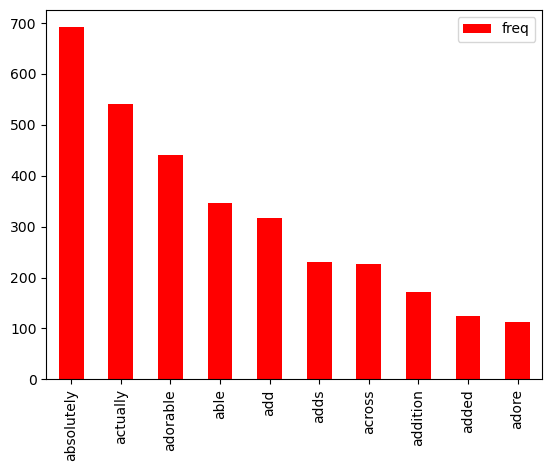

<Figure size 20000x5000 with 0 Axes>

In [54]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Red')

fig = plt.figure(figsize=(200,50))

<Axes: >

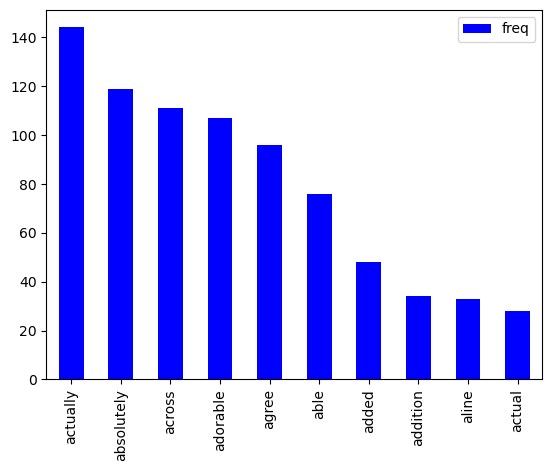

In [55]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Blue')

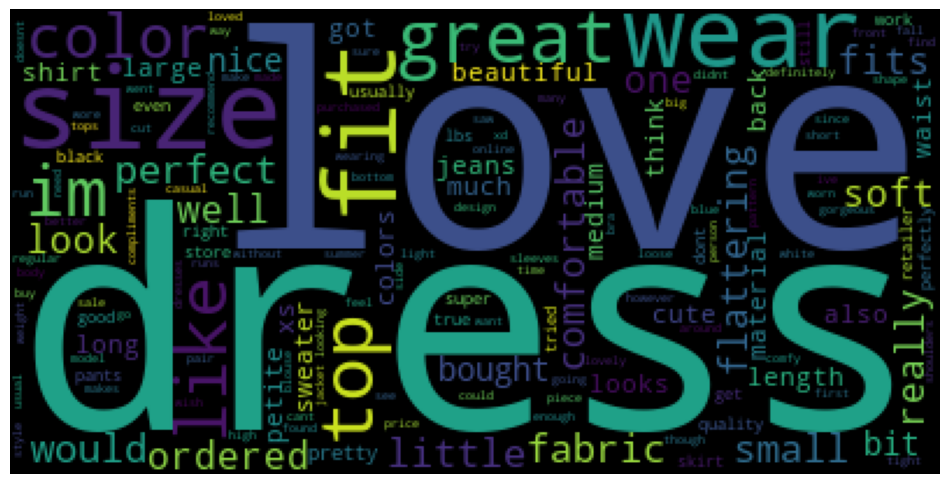

In [56]:
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [57]:
word_freq_dictionary = dict(Negative_review_dtm.apply(sum))

In [58]:
word_freq_dictionary

{'able': 76,
 'absolutely': 119,
 'across': 111,
 'actual': 28,
 'actually': 144,
 'added': 48,
 'addition': 34,
 'adorable': 107,
 'agree': 96,
 'aline': 33,
 'almost': 175,
 'along': 46,
 'already': 112,
 'also': 808,
 'although': 107,
 'always': 72,
 'amazing': 48,
 'amount': 36,
 'another': 177,
 'anyone': 62,
 'anything': 84,
 'anyway': 37,
 'apart': 48,
 'appear': 39,
 'appears': 66,
 'appropriate': 31,
 'area': 221,
 'areas': 27,
 'arm': 164,
 'armholes': 66,
 'arms': 376,
 'around': 329,
 'arrived': 158,
 'athletic': 50,
 'attached': 38,
 'attractive': 28,
 'available': 43,
 'average': 44,
 'away': 98,
 'awesome': 28,
 'awful': 76,
 'awkward': 102,
 'b': 91,
 'back': 1199,
 'bad': 231,
 'badly': 34,
 'bag': 63,
 'baggy': 90,
 'band': 53,
 'barely': 89,
 'based': 79,
 'basic': 28,
 'basically': 37,
 'bc': 42,
 'beautiful': 617,
 'beautifully': 34,
 'believe': 46,
 'belly': 34,
 'belt': 85,
 'best': 82,
 'better': 363,
 'big': 571,
 'bigger': 72,
 'billowy': 41,
 'bit': 448,
 'bl

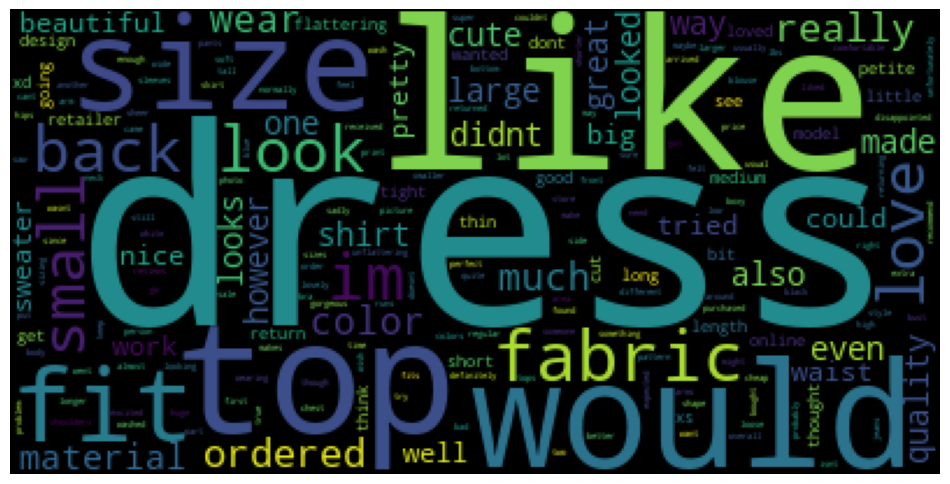

In [59]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [60]:

corr = Negative_review_dtm.corrwith(Negative_review_dtm.able) #word similarit

In [61]:
corr.sort_values(ascending=False)

able          1.000000
need          0.109041
wear          0.099675
glad          0.074965
holes         0.072416
                ...   
big          -0.024335
flattering   -0.025026
feel         -0.026140
wide         -0.027102
made         -0.028096
Length: 800, dtype: float64

In [62]:
Negative_review_dtm.T[0]

able          0
absolutely    0
across        0
actual        0
actually      0
             ..
yes           0
yet           0
youre         0
zip           1
zipper        1
Name: 0, Length: 800, dtype: int64

In [63]:
corr_docs = Negative_review_dtm.T.corrwith(Negative_review_dtm.T[0]) #document similarity

In [64]:
corr_docs.sort_values(ascending=False)

0       1.000000
227     0.366206
625     0.359969
4524    0.359382
2224    0.350799
          ...   
5129   -0.039760
1924   -0.040026
4142   -0.041719
2826   -0.042139
4605   -0.042616
Length: 5193, dtype: float64

In [65]:
corr_docs

0       1.000000
1       0.171876
2       0.226197
3       0.344552
4      -0.009333
          ...   
5188    0.121028
5189   -0.030185
5190    0.063788
5191    0.034875
5192    0.134921
Length: 5193, dtype: float64

In [66]:
Negative_review.reset_index().iloc[0][1]

C:\Users\karis\AppData\Local\Temp\ipykernel_23516\450624025.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Negative_review.reset_index().iloc[0][1]


'high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c'

In [67]:
Negative_review.reset_index().iloc[441][1]

C:\Users\karis\AppData\Local\Temp\ipykernel_23516\2618803563.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Negative_review.reset_index().iloc[441][1]


'purchased another eva franco dress retailers recent sale looking dresses work appropriate would also transition well happy hour date night seemed looking ordered regular regular usually sizes definitely small fit technically ill fitting dress short shortwaisted fe'

## Perfom predictive analytics to understand the drivers of customers who are recommending the products

In [68]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [69]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score,sentiment,Age_Group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive,26-35
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive,26-35
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Positive,51-65
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,36-50
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,36-50


In [70]:
df1= df.copy()

# Encode categorical variables (e.g., Category, Subcategory, Channel)
label_encoder = LabelEncoder()
df1['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
df1['Subcategory1_Encoded'] = label_encoder.fit_transform(df['Subcategory1'])
df1['SubCategory2_Encoded'] = label_encoder.fit_transform(df['SubCategory2'])
df1['Channel_Encoded'] = label_encoder.fit_transform(df['Channel'])




In [71]:
df1.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score,sentiment,Age_Group,Category_Encoded,Subcategory1_Encoded,SubCategory2_Encoded,Channel_Encoded
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive,26-35,2,2,5,0
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive,26-35,0,1,3,0
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,Positive,51-65,0,1,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive,36-50,1,0,13,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,Positive,36-50,0,4,0,1


In [72]:
X = df.Review_Text  
y = df.Recommend_Flag

In [73]:
X = X.apply(lambda x: clean_text(x) if isinstance(x, str) else x)
X = X.apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)


In [74]:
# Textual data (Review Text) to numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf.fit_transform(X)




In [75]:
# Combine the numerical features with TF-IDF features
X = np.hstack((df1[['Rating', 'Customer_Age', 'Category_Encoded','Subcategory1_Encoded','SubCategory2_Encoded',  'Channel_Encoded']].values, tfidf_matrix.toarray()))

# Target variable
y = df.Recommend_Flag

In [76]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#  Model Selection

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)




In [78]:
#  Model Training
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [79]:
#  Model Evaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]



In [80]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:\n", roc_auc_score(y_test, y_prob))



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       812
           1       0.95      0.97      0.96      3717

    accuracy                           0.93      4529
   macro avg       0.90      0.88      0.89      4529
weighted avg       0.93      0.93      0.93      4529

Confusion Matrix:
 [[ 636  176]
 [ 121 3596]]
AUC-ROC Score:
 0.9741803403613538


In [81]:
#Feature Importance
importances = clf.feature_importances_
feature_names = ['Rating', 'Customer_Age', 'Category_Encoded','Subcategory1_Encoded','SubCategory2_Encoded',  'Channel_Encoded'] + tfidf.get_feature_names_out().tolist()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [82]:
# Top 10 important features
print(importance_df.head(10))



            Feature  Importance
0            Rating    0.255357
1180   disappointed    0.009737
4641  unfortunately    0.008245
4762         wanted    0.007690
3490       returned    0.007467
2480           love    0.007249
3491      returning    0.006660
270            back    0.006591
2454         looked    0.006478
4637   unflattering    0.006229


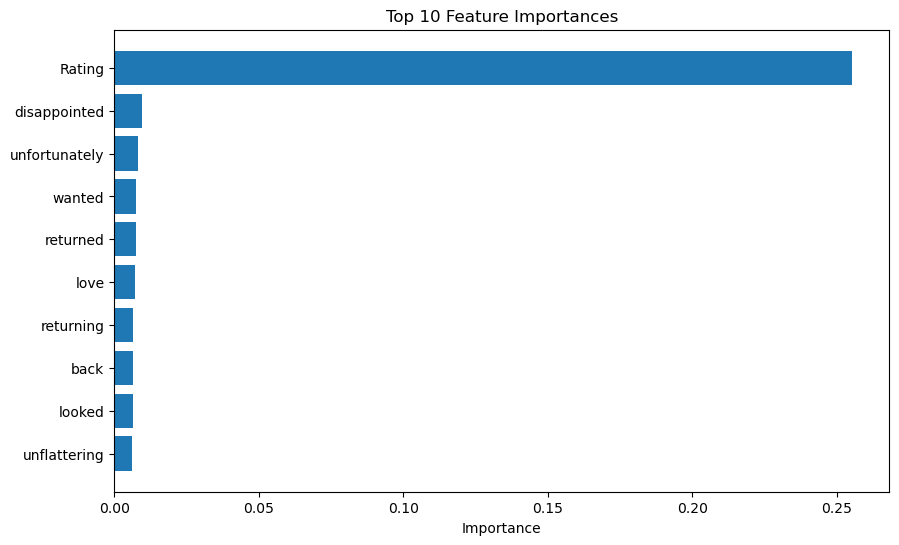

In [83]:
# Plotting feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### Create topics and understand themes behind the topics by performing topic mining

## Topic Modeling

In [84]:
# Importing Gensim
import gensim
from gensim import corpora

In [85]:
X= df['Review_Text']
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 22641, dtype: object

In [86]:
X_train_tokens = [doc.split() for doc in X]  

In [87]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)


Dictionary<39280 unique tokens: ['-', 'Absolutely', 'and', 'comfortable', 'sexy']...>


In [88]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [89]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [91]:
# Running and Training LDA model on the document term matrix

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [92]:
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.053*"i" + 0.045*"the" + 0.036*"and" + 0.029*"a" + 0.020*"to" + 0.020*"in" + 0.019*"they" + 0.015*"are" + 0.012*"but" + 0.012*"these" + 0.011*"so" + 0.011*"of" + 0.010*"with" + 0.009*"have" + 0.009*"is" + 0.009*"size" + 0.009*"it" + 0.008*"them" + 0.008*"my" + 0.008*"I"'), (1, '0.090*"the" + 0.042*"is" + 0.036*"a" + 0.032*"and" + 0.018*"i" + 0.016*"in" + 0.016*"it" + 0.013*"to" + 0.013*"this" + 0.012*"of" + 0.011*"for" + 0.011*"but" + 0.010*"not" + 0.010*"with" + 0.009*"that" + 0.009*"on" + 0.008*"very" + 0.007*"as" + 0.007*"are" + 0.006*"it\'s"'), (2, '0.065*"the" + 0.041*"i" + 0.039*"and" + 0.032*"it" + 0.031*"a" + 0.021*"was" + 0.017*"in" + 0.017*"on" + 0.015*"but" + 0.015*"this" + 0.014*"is" + 0.013*"to" + 0.013*"my" + 0.011*"for" + 0.010*"dress" + 0.009*"size" + 0.008*"so" + 0.008*"too" + 0.008*"of" + 0.008*"not"'), (3, '0.057*"a" + 0.044*"and" + 0.039*"i" + 0.033*"it" + 0.023*"with" + 0.022*"this" + 0.017*"is" + 0.016*"or" + 0.016*"for" + 0.016*"wear" + 0.014*"in" + 0.014*

In [93]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
i the and a to in they are but these so of with have is size it them my I

Topic 2, top 20 words:
the is a and i in it to this of for but not with that on very as are it's

Topic 3, top 20 words:
the i and it a was in on but this is to my for dress size so too of not

Topic 4, top 20 words:
a and i it with this is or for wear in the great to so love it's but can I

Topic 5, top 20 words:
Very comfy! Great light-weight dolman eye. flattering._x000D_ Wore flimsy. turtleneck. pass. grocery or town strip sleeves! can hoodie up with

Topic 6, top 20 words:
i it to the this and is a but was for so dress I in on that love it. my

Topic 7, top 20 words:
a and great is with very the Love This it for or this perfect - love of but looks comfortable

Topic 8, top 20 words:
pretty! shoulder, Super def accents accessories. jean, soo should've investment Comfortable padding gals. Order Too bird angel sharp summers. needing

Topic 9, top 20 words:
and it the i a to is this with

In [94]:
ldamodel.print_topics(num_topics=10, num_words=20)

[(0,
  '0.053*"i" + 0.045*"the" + 0.036*"and" + 0.029*"a" + 0.020*"to" + 0.020*"in" + 0.019*"they" + 0.015*"are" + 0.012*"but" + 0.012*"these" + 0.011*"so" + 0.011*"of" + 0.010*"with" + 0.009*"have" + 0.009*"is" + 0.009*"size" + 0.009*"it" + 0.008*"them" + 0.008*"my" + 0.008*"I"'),
 (1,
  '0.090*"the" + 0.042*"is" + 0.036*"a" + 0.032*"and" + 0.018*"i" + 0.016*"in" + 0.016*"it" + 0.013*"to" + 0.013*"this" + 0.012*"of" + 0.011*"for" + 0.011*"but" + 0.010*"not" + 0.010*"with" + 0.009*"that" + 0.009*"on" + 0.008*"very" + 0.007*"as" + 0.007*"are" + 0.006*"it\'s"'),
 (2,
  '0.065*"the" + 0.041*"i" + 0.039*"and" + 0.032*"it" + 0.031*"a" + 0.021*"was" + 0.017*"in" + 0.017*"on" + 0.015*"but" + 0.015*"this" + 0.014*"is" + 0.013*"to" + 0.013*"my" + 0.011*"for" + 0.010*"dress" + 0.009*"size" + 0.008*"so" + 0.008*"too" + 0.008*"of" + 0.008*"not"'),
 (3,
  '0.057*"a" + 0.044*"and" + 0.039*"i" + 0.033*"it" + 0.023*"with" + 0.022*"this" + 0.017*"is" + 0.016*"or" + 0.016*"for" + 0.016*"wear" + 0.014*"i

In [96]:
# Topic associations with the documents

count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.011118461), (1, 0.011119672), (2, 0.011118136), (3, 0.011119188), (4, 0.011116719), (5, 0.011118391), (6, 0.6742366), (7, 0.0111167105), (8, 0.23681946), (9, 0.0111166695)]
doc :  1 [(2, 0.52519315), (3, 0.17179352), (5, 0.2917204)]
doc :  2 [(0, 0.063631184), (2, 0.9280657)]
doc :  3 [(3, 0.15556931), (5, 0.8096315)]
doc :  4 [(1, 0.35175785), (5, 0.10913166), (8, 0.5201172)]
doc :  5 [(2, 0.7795103), (5, 0.21223065)]
doc :  6 [(0, 0.36832687), (1, 0.083175436), (5, 0.25223505), (8, 0.28919885)]
doc :  7 [(0, 0.15264553), (1, 0.17554782), (2, 0.06314596), (8, 0.6022007)]
doc :  8 [(0, 0.18170494), (2, 0.21603082), (3, 0.5822543)]
doc :  9 [(2, 0.7844841), (3, 0.15501167), (5, 0.050340906)]
doc :  10 [(2, 0.47268814), (5, 0.44311628), (6, 0.027068436), (8, 0.04815376)]
doc :  11 [(0, 0.011116647), (1, 0.011119129), (2, 0.8999424), (3, 0.011118665), (4, 0.011114875), (5, 0.011118316), (6, 0.011121496), (7, 0.011114846), (8, 0.0111188525), (9, 0.01111475)]
doc :  12 [(0, 

In [99]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    rows = []  # Collect rows in a list

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Collect data in list instead of using append
                rows.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    # Convert collected rows into DataFrame
    sent_topics_df = pd.DataFrame(rows, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the DataFrame
    contents = pd.Series(texts, name='Text')
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return sent_topics_df



In [100]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)


In [101]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6,0.6742,"a, and, great, is, with, very, the, Love, This...","[Absolutely, wonderful, -, silky, and, sexy, a..."
1,1,2,0.5252,"the, i, and, it, a, was, in, on, but, this","[Love, this, dress!, it's, sooo, pretty., i, h..."
2,2,2,0.9281,"the, i, and, it, a, was, in, on, but, this","[I, had, such, high, hopes, for, this, dress, ..."
3,3,5,0.8097,"i, it, to, the, this, and, is, a, but, was","[I, love,, love,, love, this, jumpsuit., it's,..."
4,4,8,0.5202,"and, it, the, i, a, to, is, this, with, of","[This, shirt, is, very, flattering, to, all, d..."
5,5,2,0.7795,"the, i, and, it, a, was, in, on, but, this","[I, love, tracy, reese, dresses,, but, this, o..."
6,6,0,0.3683,"i, the, and, a, to, in, they, are, but, these","[I, aded, this, in, my, basket, at, hte, last,..."
7,7,8,0.6053,"and, it, the, i, a, to, is, this, with, of","[I, ordered, this, in, carbon, for, store, pic..."
8,8,3,0.5822,"a, and, i, it, with, this, is, or, for, wear","[I, love, this, dress., i, usually, get, an, x..."
9,9,2,0.7845,"the, i, and, it, a, was, in, on, but, this","[I'm, 5""5', and, 125, lbs., i, ordered, the, s..."


In [102]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)

print("Perplexity: ", ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -7.05267610861685
